In [1]:
from pathlib import Path
data_folder = Path("/Users/persie/Desktop/Dataset_for_upload/Data")
# data_folder = Path("/Users/persie/PhD_Code/3d_ant_data_rle")

session_list = [6,10,11,13,17,19,20,21,22,23,28,29,30]
obj_ref_frame = [500,180,380,849,459, 59, 842, 24, 93, 176, 2626, 595, 241 ]
prefix = "240905-1616"
skeleton_toml_path = "skeleton.toml"

In [2]:
experiment =8
session = session_list[experiment]
obj_ref = obj_ref_frame[experiment]

In [3]:
from scripts.tools.ground_truth_toml_reader import GroundTruth
from src.loader import InstanceLoader

gt = GroundTruth(data_folder, prefix, session)
track_list = gt["tracks"]
enter_frame = gt["enter"]
touch_frame = gt["touch"]
exit_frame = gt["exit"]
grasp_frame = gt["grasp"]

# Load the experiment
t = InstanceLoader(data_folder=data_folder,
                   session_number=session,
                   skeleton_toml_path=skeleton_toml_path,
                   obj_ref_frame=obj_ref,
                   prefix=prefix,
                   track_number=track_list)


In [4]:
from scripts.tools.estimate_ground_plane import GroundPlaneEstimation
g = GroundPlaneEstimation(t.animal_list, node_list=['leg_m_L2', 'leg_m_R2', 'leg_f_L2', 'leg_f_R2'])


In [7]:
g.visualise_bounding_box()

KeyboardInterrupt: 

In [7]:
from src.collision import CollisionDetector

c = CollisionDetector(animal_list=t.animal_list,
                      obj_list=[g.get_ground_collision()],
                      node_of_interest=['a_L2', 'a_R2'])

In [5]:
from src.visual_widget import MultiViewer
V = MultiViewer(t.animal_list, t.obj_list, enter_frame, fps=30, hold_window=60, auto_play=True, axis=g.tform)


In [10]:
from scripts.tools.x_y_z_plot import KPPositionXYZ, KPVelocityXYZ, KPAccelerationXYZ, KPDisplaceMag, KPVelocityMag, \
    KPAccelerationMag, KPDisplaceXYZ

# KP = KPPosition(t.animal_list.animals[15], node=['a_L0', 'a_R0', 'neck'])
KP = KPVelocityMag(t.animal_list.animal('13'), node=['a_L2', 'a_R2'], filter_for_outlier=False
                       )

AttributeError: 'NoneType' object has no attribute 'get_frame_range'

/Users/persie/PycharmProjects/3d_ant_analysis/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/persie/PycharmProjects/3d_ant_analysis/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/persie/PycharmProjects/3d_ant_analysis/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/persie/PycharmProjects/3d_ant_analysis/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/persie/PycharmProjects/3d_ant_analysis/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=a

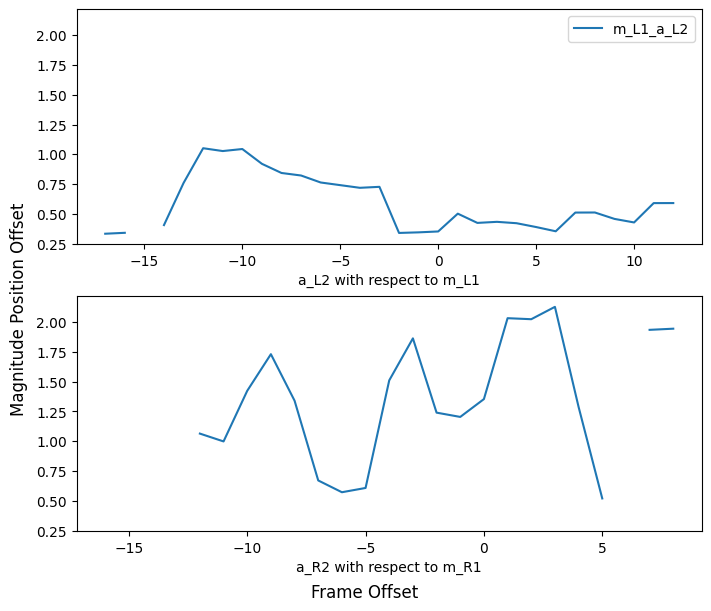

In [14]:
from scripts.tools.time_correlation import CorrelationPlot, OffsetPlot

plo = OffsetPlot(t.animal_list.animal('135'), [('m_L1', 'a_L2'), ('m_R1', 'a_R2')], (-90,90))